# Lab_2 TCV3151 Computer Vision
Bagja 9102 Kurniawan <br> 1211501345

## Preparatory Work

In [2]:
#Mount Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
#Import the packages.
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: Down sampling an image

(<matplotlib.image.AxesImage at 0x7f09a2e3dc10>, (-0.5, 840.5, 148.5, -0.5))

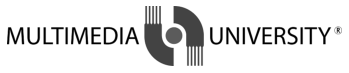

In [10]:
#Read image.
path = '/content/gdrive/My Drive/TCV3151/Lab_2/'
 
img = cv2.imread(path+'logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
plt.imshow(img, cmap='gray'), plt.axis('off')

In [11]:
#Check image size.
(height, width) = img.shape
print(img.shape)

(149, 841)


In [12]:
#Define reduction step.
reduction_step = 4
rows_keep = range(0, height, reduction_step) # Generate a list from 0,2,4,...,height
cols_keep = range(0, width, reduction_step)

In [13]:
#Initialize the subsampled image.
img_subsample = np.zeros((len(rows_keep), len(cols_keep)), dtype=np.uint8)

In [14]:
#Perform subsampling.
for i, row_value in enumerate(rows_keep):
  for j, col_value in enumerate(cols_keep):
    img_subsample[i, j] = img[row_value,col_value]

(-0.5, 210.5, 37.5, -0.5)

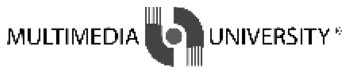

In [15]:
#Show the result.
plt.imshow(img_subsample, cmap = 'gray')
plt.axis('off')

## Question 2: Correcting the Aliasing Effect

(<matplotlib.image.AxesImage at 0x7f09a289dcd0>, (-0.5, 840.5, 148.5, -0.5))

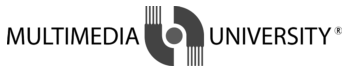

In [16]:
#Blur image.
img_blur = cv2.blur(img, (2,2))
plt.imshow(img_blur, cmap='gray'), plt.axis('off')

In [17]:
#Apply subsampling on the blurred image.
img_subsample_blur=np.zeros((len(rows_keep),len(cols_keep)),dtype=np.uint8)

for i, row_value in enumerate(rows_keep):
  for j, col_value in enumerate(cols_keep):
    img_subsample_blur[i,j] = img_blur[row_value,col_value]

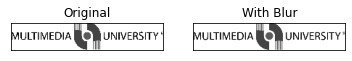

In [18]:
#Check result.
plt.subplot(1,2,1), plt.imshow(img_subsample, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_subsample_blur, cmap='gray'), plt.title('With Blur')
plt.xticks([]), plt.yticks([])
plt.show()

## Question 3: Working with bitwise operation

(<matplotlib.image.AxesImage at 0x7f09a280a210>, (-0.5, 321.5, 147.5, -0.5))

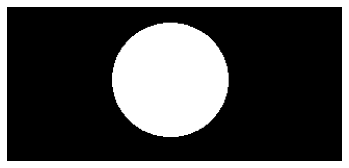

In [19]:
#Read foreground image.
foreg = cv2.imread(path + 'foreground.png')
plt.imshow(foreg), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a2765cd0>, (-0.5, 321.5, 147.5, -0.5))

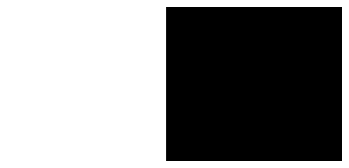

In [20]:
#Read background image.
backg = cv2.imread(path+'background.png')
plt.imshow(backg), plt.axis('off')

(-0.5, 321.5, 147.5, -0.5)

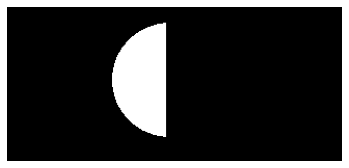

In [21]:
#Apply bitwise-and. 
result_and = cv2.bitwise_and(foreg, backg, mask = None)
plt.imshow(result_and)
plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a26a7250>, (-0.5, 321.5, 147.5, -0.5))

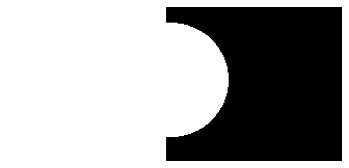

In [22]:
#Apply bitwise-or.
bitwiseor = cv2.bitwise_or(foreg,backg)
plt.imshow(bitwiseor),plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a2687890>, (-0.5, 321.5, 147.5, -0.5))

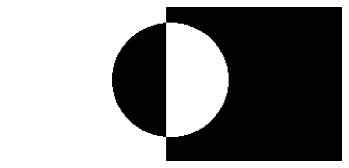

In [24]:
#Apply bitwise-xor.
bitwisexor = cv2.bitwise_xor(foreg,backg)
plt.imshow(bitwisexor),plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a26ff410>, (-0.5, 321.5, 147.5, -0.5))

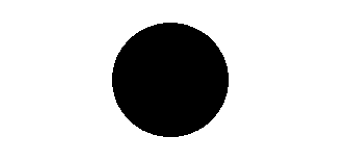

In [25]:
#Apply NOT.
bitwisenot = cv2.bitwise_not(foreg,backg)
plt.imshow(bitwisenot),plt.axis('off')

## Question 4: Application of bitwise operation – Putting Watermark on Image

(<matplotlib.image.AxesImage at 0x7f09a282b190>, (-0.5, 1139.5, 529.5, -0.5))

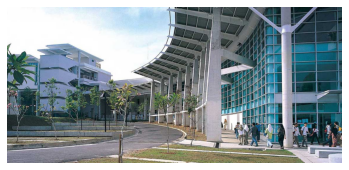

In [26]:
#Read main image.
img = cv2.imread(path + 'mmu.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a2dc5d50>, (-0.5, 840.5, 148.5, -0.5))

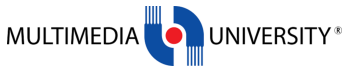

In [27]:
#Read logo image.
logo = cv2.imread(path+"logo.png")
logo=cv2.cvtColor(logo,cv2.COLOR_BGR2RGB)
plt.imshow(logo),plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a2864b50>, (-0.5, 840.5, 148.5, -0.5))

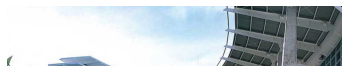

In [28]:
#Create ROI.
# I want to put logo on top-left corner, so create a ROI at that region
(rows,cols,channels) = logo.shape
roi = img[0:rows,0:cols]
plt.imshow(roi), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a0da0550>, (-0.5, 840.5, 148.5, -0.5))

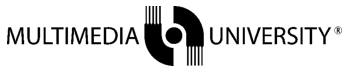

In [29]:
#Create a mask of logo and its inverse.
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)
(ret, mask) = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
plt.imshow(mask, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a0d7a390>, (-0.5, 840.5, 148.5, -0.5))

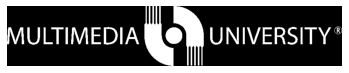

In [30]:
#Create the inverse of the mask.
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a0d52650>, (-0.5, 840.5, 148.5, -0.5))

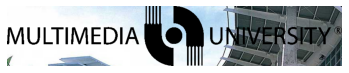

In [31]:
#Black-out the area of logo in ROI.
logo_bg = cv2.bitwise_and(roi,roi,mask=mask)
plt.imshow(logo_bg), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7f09a0cac950>, (-0.5, 840.5, 148.5, -0.5))

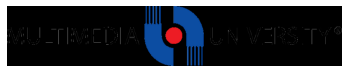

In [32]:
#Black-out the area of logo in ROI.
logo_fg = cv2.bitwise_or(logo,logo,mask=mask_inv)
plt.imshow(logo_fg), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7f09a0c86b50>, (-0.5, 840.5, 148.5, -0.5))

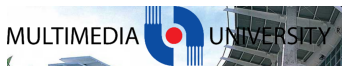

In [33]:
#Combine the area of logo in ROI.
dst = cv2.add(logo_bg,logo_fg)
plt.imshow(dst), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7f09a0bdff10>, (-0.5, 1139.5, 529.5, -0.5))

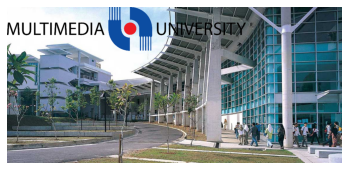

In [34]:
#Final image.
img[0:rows,0:cols]=dst
plt.imshow(img),plt.axis('off')